<a href="https://colab.research.google.com/github/SatishGollamudi/ML/blob/main/LDA_LoanData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Discriminant Analysis (LDA)** is a classical machine learning technique used for classification and dimensionality reduction. It is particularly effective when the classes are linearly separable and the data follows a normal distribution. LDA seeks to project data onto a lower-dimensional space while maximizing the separation between categories.

The main idea behind LDA is to find a linear combination of features that best separates two or more classes. It does this by:

Maximizing between-class variance (distance between class means).

Minimizing within-class variance (spread of data points within each class).

Mathematically, LDA computes a projection vector
𝑤
 such that the ratio of between-class scatter to within-class scatter is maximized. This ensures that classes are as distinct as possible in the transformed space.

How It Works
Compute class means for each target category.

Calculate scatter matrices:

Within-class scatter (how tightly points cluster within each class).

Between-class scatter (how far apart class means are).

Solve eigenvalue problem to find directions (discriminants) that maximize separation.

Project data onto these discriminant axes.

Classify new points based on their position in the reduced space.

**Applications**

Pattern recognition: Face recognition, speech recognition.

Medical diagnosis: Classifying patient outcomes.

Finance: Credit scoring, loan approval prediction.

Marketing: Customer segmentation.

Strengths
Simple and interpretable.

Works well when assumptions (normal distribution, equal covariance) hold.

Provides dimensionality reduction along with classification.

Limitations
Assumes linear boundaries between classes.

Sensitive to outliers and missing values.

Performance drops when data is highly non-linear (where tree-based methods like XGBoost excel).

LDA is a foundational classification technique that balances simplicity and interpretability. While modern ensemble methods often outperform it on messy, non-linear data, LDA remains valuable for baseline modeling, dimensionality reduction, and understanding linear class separability.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/sample_data/loan_dataset.csv')   # replace with your file


In [4]:
df["Loan_Status"] = df["Loan_Status"].map({"Y":1, "N":0})


In [5]:
for col in df.select_dtypes(include=["object"]).columns:
    if col != "Loan_ID":
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))


In [6]:
df_clean = df.dropna()


In [7]:
X = df_clean.drop(["Loan_ID","Loan_Status"], axis=1)
y = df_clean["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [8]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)


In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.693
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       614
           1       0.69      1.00      0.82      1386

    accuracy                           0.69      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.48      0.69      0.57      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


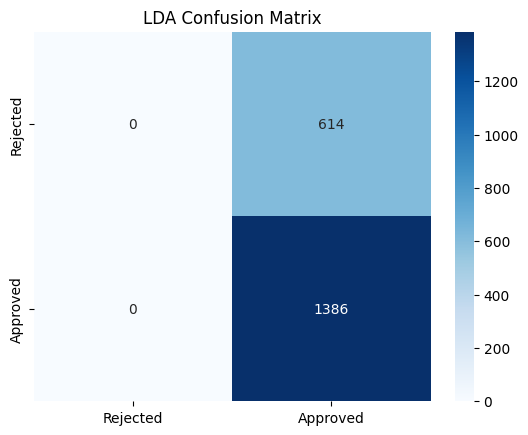

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Rejected","Approved"],
            yticklabels=["Rejected","Approved"])
plt.title("LDA Confusion Matrix")
plt.show()


In [11]:
from sklearn.metrics import accuracy_score, classification_report

# After training LDA and predicting:
y_pred = lda.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1
print(classification_report(y_test, y_pred, target_names=["Rejected","Approved"]))


Accuracy: 0.693
              precision    recall  f1-score   support

    Rejected       0.00      0.00      0.00       614
    Approved       0.69      1.00      0.82      1386

    accuracy                           0.69      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.48      0.69      0.57      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
